# 내일주가 전처리

## Load

In [1]:
import FinanceDataReader as fdr
df = fdr.DataReader(symbol='258790')
df.tail(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-02-01,1896,1954,1800,1915,706957,0.007895
2023-02-02,1916,1930,1875,1910,279562,-0.002611
2023-02-03,2060,2440,1976,2315,17980091,0.212042


## Moving Average

In [2]:
def moving_average(
    df,
    windows = [5,20,60,120],
    change=False
):
    """
    
    This is a moving average of price.
    
    Args:
      windows: list. 
      change: float. True tries changing the MA of price. (Close - MA) / Close.
      
    """
    
    for window in windows:
        MA = 'MA' + str(window)
        df[MA] = df['Close'].rolling(window=window, min_periods=1).mean()
        if change:
            df[MA] = (df['Close'] - df[MA]) / df['Close']
        else:
            pass
        
    return df

In [3]:
df = moving_average(df, change=True)
df.tail(3)

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2023-02-01,1896,1954,1800,1915,706957,0.007895,0.021410,0.087598,0.137859,0.132245
2023-02-02,1916,1930,1875,1910,279562,-0.002611,0.001571,0.076832,0.131763,0.129407
2023-02-03,2060,2440,1976,2315,17980091,0.212042,0.139784,0.223758,0.277754,0.279788


## Value(원) → Change(%)

In [4]:
def changing_price(
    df
):
    """
    
    (Open - Close) / Close
    (High - Close) / Close
    (Low - Close) / Close
    
    (Volume - Volume) / Volume
    
    """
    
    df['Open'] = (df['Open'] - df['Close']) / df['Close']
    df['High'] = (df['High'] - df['Close']) / df['Close']
    df['Low'] = (df['Low'] - df['Close']) / df['Close']

    return df

In [5]:
df = changing_price(df)
df.tail(3)

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2023-02-01,-0.009922,0.020366,-0.060052,1915,706957,0.007895,0.021410,0.087598,0.137859,0.132245
2023-02-02,0.003141,0.010471,-0.018325,1910,279562,-0.002611,0.001571,0.076832,0.131763,0.129407
2023-02-03,-0.110151,0.053996,-0.146436,2315,17980091,0.212042,0.139784,0.223758,0.277754,0.279788


## Create y label

In [6]:
def create_y_label(df):
    
    """
    
    y = 1 or 0
    
    """
    
    df['y'] = df['Change'] > 0
    df['y'] = df['y'].astype(int) 
    
    return df

In [7]:
df = create_y_label(df)
df.tail(3)

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120,y
Date,,,,,,,,,,,
2023-02-01,-0.009922,0.020366,-0.060052,1915,706957,0.007895,0.021410,0.087598,0.137859,0.132245,1
2023-02-02,0.003141,0.010471,-0.018325,1910,279562,-0.002611,0.001571,0.076832,0.131763,0.129407,0
2023-02-03,-0.110151,0.053996,-0.146436,2315,17980091,0.212042,0.139784,0.223758,0.277754,0.279788,1


## Slice year

In [11]:
def slice_year(df,year):
    
    """
    
    after year
    
    """
    
    year = str(year)
    
    df = df[year:]
    df = df[1:]
    
    return df

In [12]:
df = slice_year(df,'2015')
df.head()

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120,y
Date,,,,,,,,,,,
2017-04-28,-0.001029,0.004117,-0.003088,1943,152313,0.000000,0.000000,0.000000,0.000000,0.000000,0
2017-05-02,-0.002561,0.027152,-0.007172,1952,171339,0.004632,0.003074,0.003074,0.003074,0.003074,1
2017-05-04,0.012807,0.012807,-0.002561,1952,68635,0.000000,0.002305,0.002305,0.002305,0.002305,0
2017-05-08,0.000000,0.007172,0.000000,1952,14646,0.000000,0.001844,0.001844,0.001844,0.001844,0
2017-05-10,0.002044,0.002044,-0.002555,1957,7680,0.002561,0.002964,0.003662,0.003662,0.003662,1


## Non-stationary vs Stationary

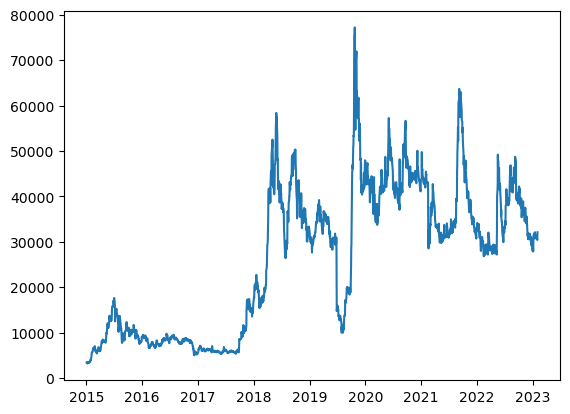

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()

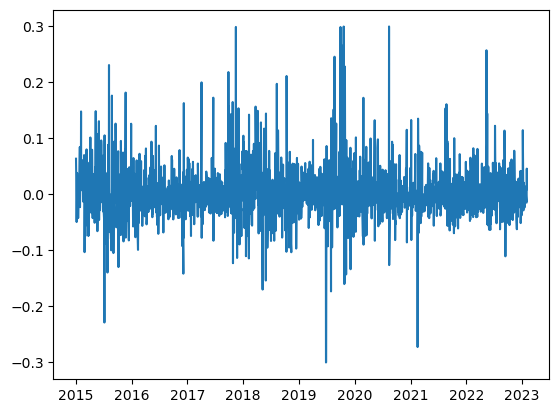

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['Change'])
plt.show()

## Split x and y

In [10]:
def split_x_y(df):
    
    """
    
    Prepare X and y
    
    """
    
    X = df[['MA5', 'MA20', 'MA60', 'MA120', 'Volume', 'Change', 'Open', 'High', 'Low']]
    y = df['y']
    
    X = X[:-1]
    y = y[1:]
    
    return X, y

In [17]:
X, y = split_x_y(df)
print(len(X),len(y))

1990 1990


## 최종코드

In [18]:
def moving_average(
    df,
    windows = [5,20,60,120],
    change=False
):
    """
    
    This is a moving average of price.
    
    Args:
      windows: list. 
      change: float. True tries changing the MA of price. (Close - MA) / Close.
      
    """
    
    for window in windows:
        MA = 'MA' + str(window)
        df[MA] = df['Close'].rolling(window=window, min_periods=1).mean()
        if change:
            df[MA] = (df['Close'] - df[MA]) / df['Close']
        else:
            pass
        
    return df

def changing_price(
    df
):
    """
    
    (Open - Close) / Close
    (High - Close) / Close
    (Low - Close) / Close
    
    (Volume - Volume) / Volume
    
    """
    
    df['Open'] = (df['Open'] - df['Close']) / df['Close']
    df['High'] = (df['High'] - df['Close']) / df['Close']
    df['Low'] = (df['Low'] - df['Close']) / df['Close']

    return df

def create_y_label(df):
    
    """
    
    y = 1 or 0
    
    """
    
    df['y'] = df['Change'] > 0
    df['y'] = df['y'].astype(int) 
    
    return df

def slice_year(df,year):
    
    """
    
    after year
    
    """
    
    year = str(year)
    
    df = df[year:]
    df = df[1:]
    
    return df

def split_x_y(df):
    
    """
    
    Prepare X and y
    
    """
    
    X = df[['MA5', 'MA20', 'MA60', 'MA120', 'Volume', 'Change', 'Open', 'High', 'Low']]
    y = df['y']
    
    X = X[:-1]
    y = y[1:]
    
    return X, y

## Example

In [ ]:
import FinanceDataReader as fdr
df = fdr.DataReader(symbol='028300')

In [20]:
df = moving_average(df, change=True)
df = changing_price(df)
df = create_y_label(df)
df = slice_year(df,'2015')
X, y = split_x_y(df)

In [23]:
X.tail()

,MA5,MA20,MA60,MA120,Volume,Change,Open,High,Low
Date,,,,,,,,,
2023-01-26,0.009236,0.031210,-0.027849,-0.172910,385469,0.008026,-0.014331,0.000000,-0.025478
2023-01-27,0.002556,0.026438,-0.028036,-0.174274,331294,-0.003185,-0.003195,0.017572,-0.009585
2023-01-30,-0.009724,0.010049,-0.039673,-0.188521,376888,-0.014377,0.006483,0.025932,-0.001621
2023-01-31,-0.020395,-0.007895,-0.051880,-0.202434,520871,-0.014587,0.008224,0.023026,-0.008224
2023-02-01,0.020440,0.030346,-0.003339,-0.146100,1411118,0.046053,-0.025157,0.039308,-0.028302


In [24]:
y.tail()

Date
2023-01-27    0
2023-01-30    0
2023-01-31    0
2023-02-01    1
2023-02-02    0
Name: y, dtype: int32